In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import sys
import os

# Add the scripts folder to the system path so we can import Db_connectivity
sys.path.append(os.path.abspath('../scripts'))

from DB_connectivity import connect_to_db  # Import the connection function from your module

In [2]:

# Configure Seaborn for better visualization aesthetics
sns.set(style="whitegrid")

# Database details
TABLE_NAME = 'medical_info'  # Define the table name
dbname='ethiomedical_info'

# Load data from the database into a DataFrame
def load_data_from_db(table_name):
    conn = connect_to_db(dbname)  # Use the connection function from Db_connectivity
    if conn:
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql(query, conn)
        conn.close()
        return df
    else:
        print("Failed to connect to the database.")
        return None


In [3]:
# Load data from the PostgreSQL database
df = load_data_from_db(TABLE_NAME)

# Check if data was loaded
if df is not None:
    # Display the first few rows of the DataFrame
    display(df.head())

    # Display basic statistics
    display(df.describe())


Connection to PostgreSQL database established successfully.


C:\Users\user\AppData\Local\Temp\ipykernel_2816\756096286.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,channel_title,channel_username,id,message,date,media_path
0,doctors ethiopia,doctorset,864,https://youtu.be/5dboem-8kma?si=ldlueecnfuljvd...,2023-12-18 17:04:02+00:00,unknown
1,doctors ethiopia,doctorset,863,ዶክተርስ ኢትዮጵያ በ አዲስ አቀራረብ በ ቴሌቪዥን ፕሮግራሙን ለመጀመር ከ...,2023-11-03 16:14:39+00:00,unknown
2,doctors ethiopia,doctorset,862,ሞት በስኳር \n\nለልጆቻችን የምናሲዘው ምሳቃ ሳናቀው እድሚያቸውን ይቀን...,2023-10-02 16:37:39+00:00,unknown
3,doctors ethiopia,doctorset,861,ከ hiv የተፈወሰ ሰው አጋጥሟችሁ ያቃል ? ፈውስ እና ህክምና ?\n\nሙ...,2023-09-16 07:54:32+00:00,unknown
4,doctors ethiopia,doctorset,860,በቅርብ ጊዜ በሃገራችን ላይ እየተስተዋለ ያለ የተመሳሳይ ፆታ ( homos...,2023-09-01 16:16:15+00:00,unknown


,channel_title,channel_username,id,message,date,media_path
count,6514,6514,6514,6514,6514,6514
unique,4,5,4472,2903,4147,4811
top,lobelia pharmacy and cosmetics,@lobelia4cosmetics,864,unknown,2024-10-08 04:35:59+00:00,unknown
freq,2193,2193,4,1262,24,1704


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4840 (\N{ETHIOPIC SYLLABLE YA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4900 (\N{ETHIOPIC SYLLABLE THEE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4755 (\N{ETHIOPIC SYLLABLE NAA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4808 (\N{ETHIOPIC SYLLABLE WA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4877 (\N{ETHIOPIC SYLLABLE GE

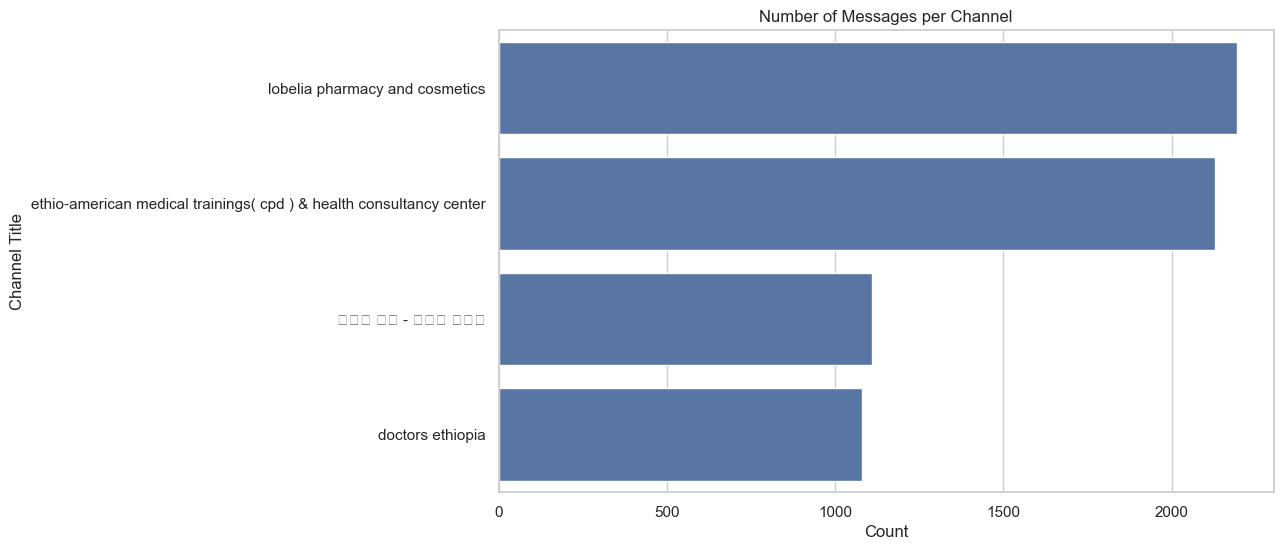

In [4]:
 # Plotting the number of messages per channel
plt.figure(figsize=(10, 6))
sns.countplot(y='channel_title', data=df, order=df['channel_title'].value_counts().index)
plt.title('Number of Messages per Channel')
plt.xlabel('Count')
plt.ylabel('Channel Title')
plt.show()

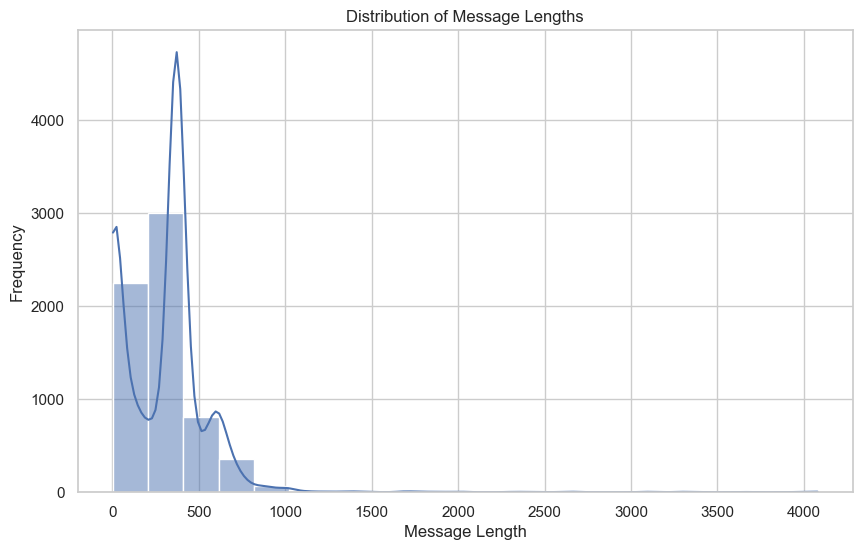

In [5]:
 # Plotting message length distribution
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=20, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


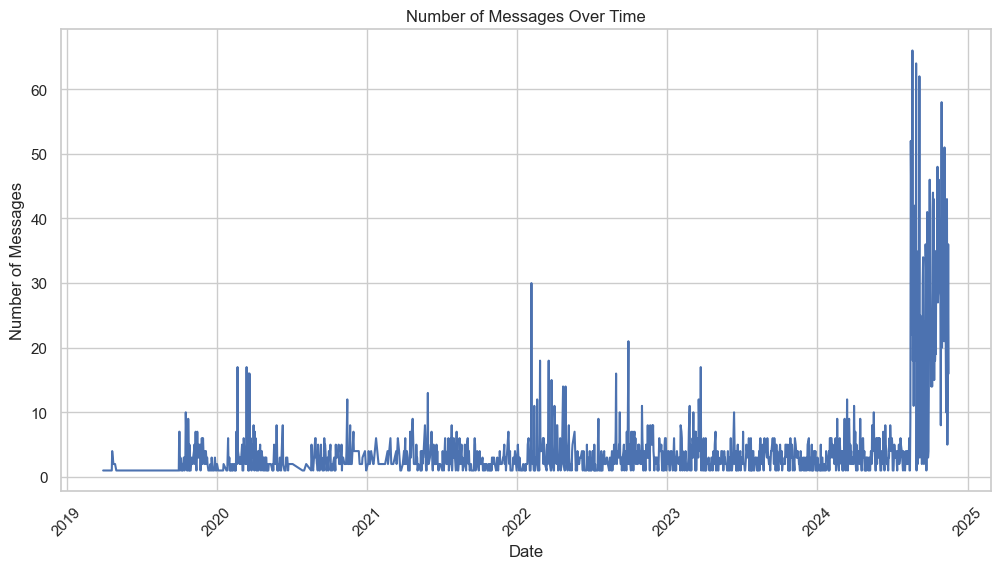

In [6]:
# Time series plot of messages
    # Convert 'Date' column to datetime format if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

plt.figure(figsize=(12, 6))
df.groupby(df['date'].dt.date).size().plot(kind='line')
plt.title('Number of Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.show()
